Imágenes organizadas ✔
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


c:\Users\David Hernandez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 78, 78, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 39, 39, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │        82,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,369 (329.57 KB)

 Trainable params: 84,369 (329.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 293s 117ms/step - accuracy: 0.5077 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


C:\Users\David Hernandez\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


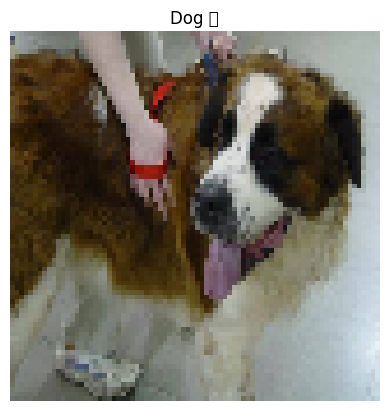

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Imagen evaluada: C:\Users\David Hernandez\Desktop\Deep Learning\Dataset\cats\cat.12247.jpg
Predicción: PERRO 


In [2]:
# =====================================================
# 1) IMPORTAR LIBRERÍAS
# =====================================================
import os
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

# =====================================================
# 2) PARÁMETROS ULTRA LIGEROS
# =====================================================
IMG_SIZE = 80
BATCH_SIZE = 8
EPOCHS = 3

original_dir =r"C:\Users\David Hernandez\Desktop\Deep Learning\dogs-vs-cats\train"
base_dir = r"C:\Users\David Hernandez\Desktop\Deep Learning\Dataset"

cats_dir = os.path.join(base_dir, "cats")
dogs_dir = os.path.join(base_dir, "dogs")

# =====================================================
# 3) CREAR CARPETAS Y MOVER IMÁGENES (SOLO UNA VEZ)
# =====================================================
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

files = os.listdir(original_dir)

for file in files:
    src = os.path.join(original_dir, file)

    if file.startswith("cat"):
        shutil.copy(src, os.path.join(cats_dir, file))
    elif file.startswith("dog"):
        shutil.copy(src, os.path.join(dogs_dir, file))

print("Imágenes organizadas ✔")

# =====================================================
# 4) GENERADORES (CON VALIDATION SPLIT)
# =====================================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# =====================================================
# 5) MODELO MUY PEQUEÑO (ULTRA LIGERO)
# =====================================================
model = models.Sequential([
    layers.Conv2D(8, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),  # TRES CANALES DE COLOR!
    layers.MaxPooling2D(2,2),

    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =====================================================
# 6) ENTRENAMIENTO
# =====================================================
model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# =====================================================
# 7) MOSTRAR UNA IMAGEN
# =====================================================
images, labels = next(train_generator)

plt.imshow(images[0])
plt.title("Dog 🐶" if labels[0]==1 else "Cat 🐱")
plt.axis("off")
plt.show()

# =====================================================
# 8) PREDICCIÓN SOBRE UNA IMAGEN
# =====================================================
img_path = train_generator.filepaths[0]

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print("Imagen evaluada:", img_path)

if prediction[0][0] > 0.5:
    print("Predicción: PERRO ")
else:
    print("Predicción: GATO ")
